# ジュピターでニューラルネットワークと遊ぼう

## ニューラルネットワークとは

### ニューロンについて

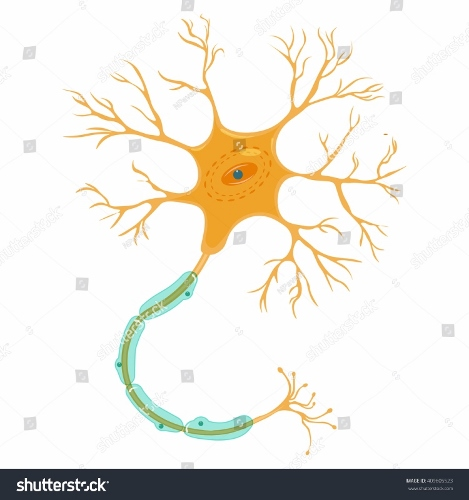

### ニューラルネットワーク

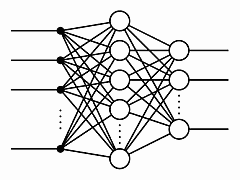


## 手書き数字認識準備

### パッケージ読み込み

In [1]:
import sys, os
import numpy as np
import pickle
from machine_learning_for_scratch.dataset.mnist import load_mnist
from PIL import Image
import math
import matplotlib.pyplot as plt

### 関数

シグモイド関数
$$
\sigma(x) = \frac{1}{1+\exp{(-x)}}
$$
ソフトマックス関数
$$
y_k = \frac{\exp{(a_k)}}{{\displaystyle \sum^{n}_{i=1}} \exp{(a_i)}}
$$


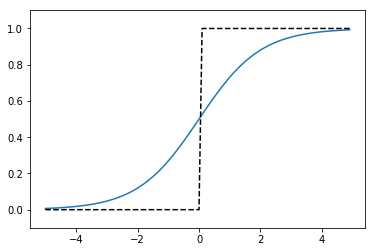

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()

### MNIST

解析用にMNISTデータ読み込み

In [3]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

画像確認

In [4]:
def img_show(img):
    img = img*255
    img = img.reshape(28, 28)
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [5]:
def plt_show(img):
    img = img*255
    plt.imshow(img.reshape(28,28))
    plt.show()

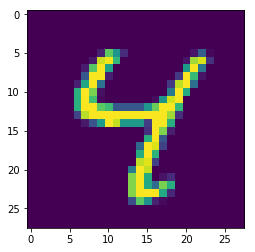

答： 4


In [8]:
i=6
x, t = get_data()
#img_show(x[1])
plt_show(x[i])
print("答：", t[i])

In [10]:
len(x)

10000

### ネットワーク周り

ネットワーク読み込み

In [11]:
def init_network():
    with open(os.path.join("machine_learning_for_scratch","sample_weight.pkl"), 'rb') as f:
        network = pickle.load(f)
    return network

ネットワークにかける

In [12]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

## 解析

とりあえずやってみる。

セッティング：

In [13]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
wrong = []

In [15]:
i=7

In [16]:
y = predict(network,x[i])
p = np.argmax(y)
print("答：",t[i],"。予想：",p)

答： 9 。予想： 9


精度確認

In [17]:
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1
    else:
        wrong.append(i)

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


間違えた図を見てみる

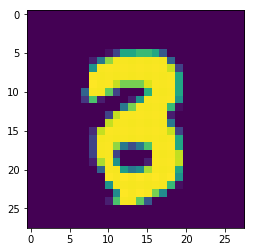

答： 3 。予想： 8


In [18]:
i=78
plt_show(x[wrong[i]])
print("答：",t[wrong[i]],"。予想：",np.argmax(predict(network,x[wrong[i]])))

## いろいろプロットしてみる

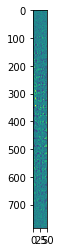

In [15]:
plt.imshow(network["W1"])
plt.show()

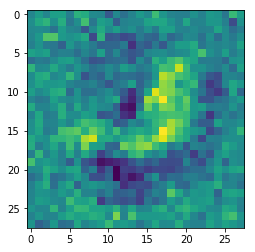

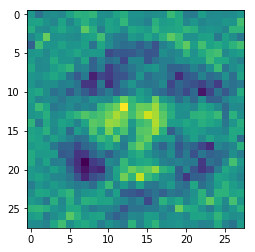

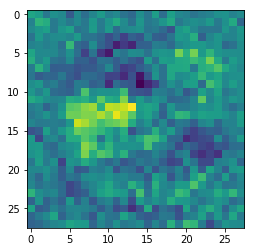

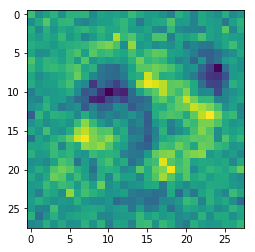

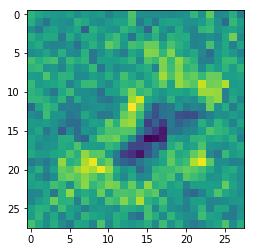

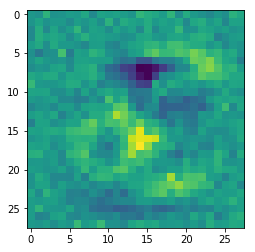

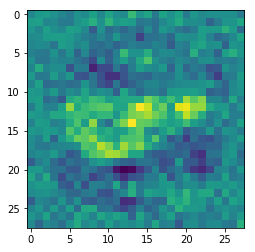

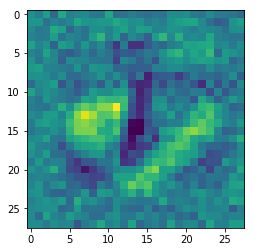

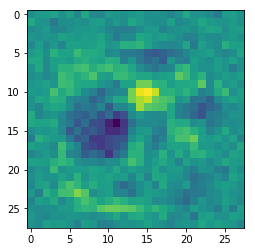

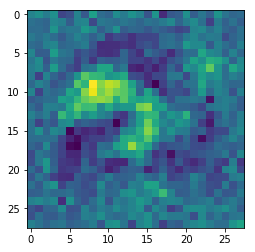

In [19]:
for i in range(20,30):
    plt_show(network["W1"][0:784,i])

In [20]:
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [21]:
network["W1"][350]

array([ 0.20352413, -0.33930475,  0.06150815, -0.26631057, -0.07892901,
       -0.2160303 , -0.22190729, -0.01528745, -0.01297976,  0.05398425,
       -0.15247467,  0.18364453,  0.11850423,  0.31343549, -0.25951135,
        0.15251592, -0.07604213,  0.09956405,  0.20716119,  0.01191536,
       -0.0500697 ,  0.10915728,  0.04131675, -0.09007927,  0.10182612,
       -0.13656642,  0.23715706, -0.17780851,  0.25585544,  0.17799285,
        0.12032107,  0.07057133, -0.15111442,  0.02421915, -0.04981516,
        0.2289737 ,  0.17567438,  0.22678043,  0.04445645,  0.01567732,
        0.04406427,  0.02775704,  0.10654916, -0.18257031,  0.09333349,
        0.07071131, -0.1976741 , -0.28023955,  0.10439868, -0.21244228], dtype=float32)

In [11]:
for key in network.keys():
    print(key, network[key].shape)

b2 (100,)
W1 (784, 50)
b1 (50,)
W2 (50, 100)
W3 (100, 10)
b3 (10,)


## ネットワークを逆向きに計算してみる

In [22]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

In [23]:
a1 = np.dot(x[100], W1) + b1
z1 = sigmoid(a1)
a2 = np.dot(z1, W2) + b2
z2 = sigmoid(a2)
a3 = np.dot(z2, W3) + b3
y = softmax(a3)

In [24]:
print(y)
np.argmax(y)

[  1.64981786e-04   2.80873734e-04   4.46586162e-02   6.82160753e-05
   1.76548329e-03   7.07103754e-04   9.52186167e-01   3.33890021e-05
   1.32181682e-04   3.10497694e-06]


6

In [25]:
W3

array([[ -4.21735764e-01,   6.89445496e-01,   8.78510177e-02,
         -4.83838320e-01,  -1.95891604e-01,  -3.11136067e-01,
          5.49542189e-01,   5.37674278e-02,  -3.05000603e-01,
          2.75984704e-02],
       [ -5.24320543e-01,  -1.43624887e-01,  -4.42160573e-03,
          4.17745829e-01,   2.15625867e-01,  -2.56584466e-01,
         -1.00939667e+00,   8.12479675e-01,  -3.98552269e-02,
          8.23425591e-01],
       [  6.82799876e-01,  -5.12037337e-01,  -4.41083580e-01,
         -8.21710154e-02,   3.19505751e-01,   1.08093655e+00,
          2.96021044e-01,  -4.06458199e-01,  -3.87590617e-01,
         -9.11374271e-01],
       [  1.55144155e-01,   6.78902492e-02,   9.47823405e-01,
         -1.68429948e-02,  -5.80456555e-01,   3.27762365e-02,
          3.62194031e-01,   7.43931830e-01,  -8.67070615e-01,
         -8.71464610e-01],
       [  5.05435288e-01,  -2.73010045e-01,  -3.86344641e-02,
          1.62854403e-01,  -6.88129485e-01,   3.32544267e-01,
          2.02865437e-01

In [68]:
for i in range(1,1000):
    if t[i] == 3:
        print(i)
        break

18


In [39]:
img_show(x[3]*255)

In [18]:
y

array([  4.83633252e-03,   1.10458664e-03,   9.44252312e-01,
         1.43091511e-02,   5.69896656e-07,   6.67604851e-03,
         2.75334045e-02,   1.27084218e-06,   1.28642481e-03,
         4.78648055e-08], dtype=float32)

In [44]:
a3

array([ 2.07899594,  0.60231042,  7.35323238,  3.16373825, -6.96721649,
        2.40136504,  3.81823897, -6.16523695,  0.75470579, -9.44429111], dtype=float32)

In [110]:
y = np.array([5,0,0,0,0,0,0,0,0,0])

In [83]:
a_back2 = sigmoid(np.dot(W3,y-b3))
a_back1 = sigmoid(np.dot(W2,a_back2-b2))
a_back = sigmoid(np.dot(W1,a_back1-b1))
img_show(np.absolute(a_back-0.5)*255)

In [81]:
a_back2 = sigmoid(np.dot(W3,y))
a_back1 = sigmoid(np.dot(W2,a_back2))
a_back = sigmoid(np.dot(W1,a_back1))
img_show((a_back-0.5)*255)

In [111]:
a_back2 = sigmoid(np.dot(W3,y))-0.5
a_back1 = sigmoid(np.dot(W2,a_back2-b2))-0.5
a_back = sigmoid(np.dot(W1,a_back1-b1))
img = a_back-0.5
img[img<0] = 0
img_show(img*255)

In [112]:
b1

array([-0.06750315,  0.0695926 , -0.02730473,  0.02256093, -0.22001474,
       -0.22038847,  0.04862635,  0.13499236,  0.23342554, -0.0487357 ,
        0.10170191, -0.03076038,  0.15482435,  0.05212503,  0.06017235,
       -0.03364862, -0.11218343, -0.26460695, -0.03323386,  0.13610415,
        0.06354368,  0.04679805, -0.01621654, -0.05775835, -0.03108677,
        0.10366164, -0.0845938 ,  0.11665157,  0.21852103,  0.04437255,
        0.03378392, -0.01720384, -0.07383765,  0.16152057, -0.10621249,
       -0.01646949,  0.00913961,  0.10238428,  0.00916639, -0.0564299 ,
       -0.10607515,  0.09892716, -0.07136887, -0.06349134,  0.12461706,
        0.02242282, -0.00047972,  0.04527043, -0.15179175,  0.10716812], dtype=float32)

In [113]:
b2

array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306, -0.03

In [114]:
b3

array([-0.06023985,  0.00932628, -0.01359946,  0.02167128,  0.0107372 ,
        0.06619699, -0.08397342, -0.00912251,  0.00576962,  0.0532335 ], dtype=float32)

In [4]:
a = np.arange(30).reshape(2, 3, 5)
print(a)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]


In [5]:
print(a[0])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [6]:
a[0].shape

(3, 5)

In [31]:
a[::]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [33]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

## その他

## スケーリング

In [28]:
len(x[1])
a = np.ones(784)

In [29]:
a

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [30]:
b = np.dot(a,W1)

In [31]:
b

array([  9.28849981,  10.9605646 ,   0.92168225,  -6.63758669,
        10.15810469,  14.37382857,   3.00897769,   3.4320765 ,
         4.37988335,   7.44220602,   5.62293486,   0.64439512,
        -6.3401685 ,   4.77585095,  -6.11515536,   5.69158816,
         3.33390744,  -0.09964726, -19.01050093,   3.81952035,
        -6.54792708, -15.94137216,   0.06930643,   3.04796972,
         5.27021385,  -0.45225731,  -3.65994092,  -6.74976545,
         1.86064778,  -0.18069476, -13.73797104,   2.85967336,
         9.83846913,  -1.3493783 ,   5.96604782, -10.40392819,
        -1.50540849,   5.74518596,   1.73586532,   5.11057426,
         2.51164266,  -5.30909512,   0.55233124,  -2.83128204,
        -8.64246568,   4.62619776,  11.04398038,  -1.8581497 ,
        -0.87277046,  -5.13591209])

In [34]:
predict(network,a)

array([  3.96334857e-02,   1.95775956e-04,   1.06390808e-01,
         6.61843026e-01,   1.54414102e-05,   7.30989483e-02,
         1.42304296e-04,   4.09463419e-04,   1.18094459e-01,
         1.76287669e-04])

3


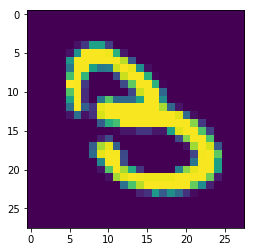

In [69]:
i=18
print(t[i])
plt_show(x[i])

In [70]:
predict(network,x[18])

array([  5.03678108e-04,   4.14391188e-03,   7.13972524e-02,
         8.61154079e-01,   3.36609257e-04,   2.55517997e-02,
         7.85598624e-03,   6.08135830e-04,   2.82928403e-02,
         1.55703630e-04], dtype=float32)

In [73]:
print(np.dot(x[18],W1))

[ 2.55150938  2.43416381 -0.35033029 -1.89666224  3.42736101  1.93005514
 -1.99937606  1.96213841  2.3505249   6.4472084  -0.02830548  2.50369811
 -4.55304241  4.70643282 -2.18063378  2.13370824 -1.44274807  0.20900171
 -6.53760386  0.5444144  -4.22266769 -2.18817759 -1.02531719  1.39134669
  0.80541384 -0.45467094 -0.13598265 -1.86516154  2.13615537  0.60649747
 -4.8831625  -0.92683071  3.28234386  1.58611524  1.79981744 -3.1903429
  1.20185626  1.97287762  2.05525446  1.95946157 -1.04362631 -1.51570463
 -0.97738016 -1.77669191 -2.09118962 -0.55641353  5.4186821  -3.63407493
 -0.87106043 -0.47239408]


In [71]:
a0=np.zeros_like(x[1])

In [72]:
predict(network,a0)

array([ 0.00369753,  0.02237163,  0.01116107,  0.01846799,  0.01421143,
        0.42078003,  0.01033748,  0.48984006,  0.00081407,  0.00831865], dtype=float32)

In [37]:
a=[]

In [39]:
a.append(np.zeros_like(x[1]))

In [42]:
a[0][0]=1

In [46]:
b=[]
b.append(np.dot(a[0],W1))
print(b[0])

[-0.00741249 -0.00790439 -0.01307499  0.01852573 -0.00153461 -0.00876485
 -0.02929461 -0.02101859 -0.01490408 -0.00563215 -0.00669386 -0.09532019
  0.02302948  0.00116916  0.04227314  0.00876646  0.02783365 -0.03575159
  0.01493105 -0.00444681 -0.01983534 -0.00654568  0.05530919  0.0602967
  0.04177547 -0.01497498 -0.01285678  0.01684514 -0.01641353  0.03349771
  0.01523217  0.03068517 -0.019785    0.01470414 -0.02748215  0.0103357
  0.00324177  0.01369166  0.04739346 -0.00776699  0.01009176 -0.03811338
 -0.03022793 -0.00554773  0.06369497  0.0315716   0.06316955  0.01978721
 -0.04331266 -0.01350104]


In [74]:
predict(network,x[1])

array([  4.83633252e-03,   1.10458664e-03,   9.44252312e-01,
         1.43091511e-02,   5.69896656e-07,   6.67604851e-03,
         2.75334045e-02,   1.27084218e-06,   1.28642481e-03,
         4.78648055e-08], dtype=float32)

In [75]:
predict(network,x[1]*2)

array([  2.91370274e-03,   8.87652626e-04,   9.64417636e-01,
         8.19296204e-03,   2.16468635e-07,   3.62283667e-03,
         1.93195846e-02,   5.61577565e-07,   6.44852640e-04,
         1.25607533e-08], dtype=float32)

In [76]:
predict(network,x[1]*3)

array([  2.17471039e-03,   9.50994727e-04,   9.69695628e-01,
         7.51657318e-03,   1.70550223e-07,   3.06323660e-03,
         1.60557833e-02,   4.78908248e-07,   5.42341790e-04,
         8.81297435e-09], dtype=float32)

8 8


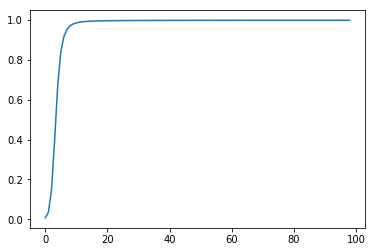

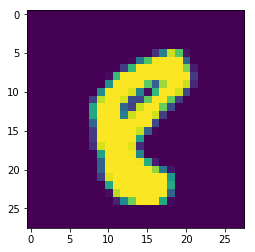

In [148]:
value = []
j=761
k=np.argmax(predict(network,x[j]))
for i in range(1,100):
    value.append(predict(network,x[j]*i/10)[ｋ])
print(t[j],k)
plt.plot(value)
plt.show()
plt_show(x[j])

999:予想結果が違う、t=9,k=7,k=9で正しい振る舞いに

In [140]:
np.argmax(predict(network,x[j]*10))

9

In [98]:
wrong

[8,
 33,
 66,
 92,
 124,
 149,
 217,
 233,
 241,
 245,
 247,
 259,
 290,
 300,
 313,
 320,
 321,
 340,
 341,
 352,
 358,
 362,
 381,
 445,
 448,
 449,
 478,
 479,
 495,
 502,
 507,
 511,
 531,
 543,
 551,
 565,
 569,
 578,
 582,
 591,
 610,
 619,
 627,
 629,
 659,
 684,
 691,
 707,
 717,
 720,
 740,
 791,
 810,
 839,
 844,
 857,
 881,
 882,
 898,
 924,
 938,
 939,
 947,
 950,
 956,
 965,
 982,
 999,
 1014,
 1032,
 1039,
 1044,
 1050,
 1062,
 1068,
 1082,
 1107,
 1112,
 1114,
 1119,
 1124,
 1181,
 1191,
 1192,
 1194,
 1198,
 1204,
 1206,
 1224,
 1226,
 1232,
 1242,
 1247,
 1251,
 1256,
 1260,
 1283,
 1289,
 1299,
 1319,
 1325,
 1326,
 1328,
 1337,
 1364,
 1378,
 1393,
 1410,
 1413,
 1429,
 1433,
 1440,
 1444,
 1465,
 1466,
 1467,
 1494,
 1500,
 1522,
 1525,
 1527,
 1530,
 1549,
 1553,
 1559,
 1569,
 1581,
 1601,
 1609,
 1621,
 1634,
 1640,
 1671,
 1678,
 1681,
 1696,
 1709,
 1717,
 1722,
 1732,
 1737,
 1751,
 1754,
 1759,
 1765,
 1772,
 1773,
 1782,
 1790,
 1800,
 1813,
 1828,
 1850,
 1

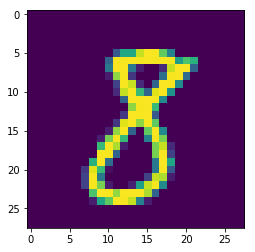

## Gradient実装

### 実装例

#### 関数例  

$$f(x,y) = x^2 + y^2$$

In [30]:
def f(x,y):
    return x*x + y*y

In [31]:
def ev_f(x):
    return f(x[0],x[1])

#### 関数を評価する

In [58]:
x_0 = np.array([1.0,1.0])

In [59]:
ev_f(x_0)

2.0

#### 微分、準備

In [12]:
epsilon = 0.01

In [13]:
step_c = 0.5/epsilon

In [15]:
df = np.zeros_like(x[0])

#### 微分して、移動、一回だけ

In [16]:
x_new = np.zeros_like(x[0])

In [17]:
f0 = ev_f(x_new)

NameError: name 'ev_f' is not defined

In [63]:
for i in range(0, x_new.size):
    x_new[i] += epsilon
    df[i] = ev_f(x_new) - f0
    x_new[i] -= epsilon

In [65]:
x_new += df * step_c

In [66]:
x_new

array([ 1.0201,  1.0201])

#### 微分して移動、複数回

In [80]:
exe_times = 30

In [81]:
x_new = x_0
for i in range(0, exe_times):
    f_0 = ev_f(x_new)
    
    for i in range(0, x_new.size):
        x_new[i] += epsilon
        df[i] = ev_f(x_new) - f_0
        x_new[i] -= epsilon
        
    x_new -= df * step_c  
    

In [82]:
x_new

array([-0.005, -0.005])

### 実装

必要なこと

- 関数と関数の評価
- 微分用の微小量：$\epsilon$
- 移動距離を定める係数：$\frac{\delta x}{\epsilon}$
- 移動回数か、計算終了

#### ネットワークでやってみる

In [506]:
x, t = get_data()
network = init_network()
index = 5

In [507]:
def ev_f(x):
    return (predict(network, x)[index]-1)**2

In [20]:
ev_f(x[1])

0.97158644960888496

In [21]:
x_0 = np.ones_like(x[1])

In [499]:
epsilon = 0.001

In [554]:
step_c = 100

In [25]:
df = np.zeros_like(x_0)

In [26]:
x_new = x_0

In [27]:
f0 = ev_f(x_new)

In [85]:
for i in range(0, x_new.size):
    x_new[i] += epsilon
    df[i] = ev_f(x_new) - f0
    x_new[i] -= epsilon

In [86]:
x_new += df * step_c

##### 繰り返し値を探す

In [441]:
import random

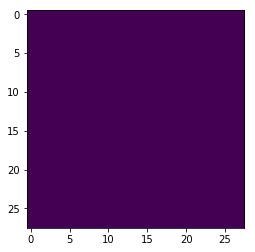

In [571]:
x_new = np.zeros_like(x[1])
plt_show(x_new)

In [572]:
exe_times = 100

1.52234193251e-05


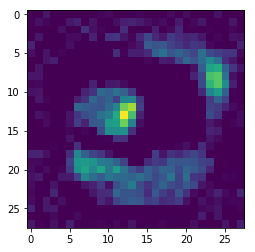

-8.37052e-09 276 1.34907e-08 486
376 1.0
68.9643 [  1.09972747e-03   1.35597356e-05   8.51209916e-06   9.35036660e-05
   2.81523498e-05   9.96098280e-01   1.67005346e-03   2.03964404e-07
   9.87100764e-04   8.76902448e-07]


In [574]:
for i in range(0, exe_times):
    f_0 = ev_f(x_new)
    
    for i in range(0, x_new.size):
        x_new[i] += epsilon
        df[i] = ev_f(x_new) - f_0
        x_new[i] -= epsilon
    
#    print(np.argmin(abs(df)),x_new[np.argmin(abs(df))])
#    x_new[np.argmin(abs(df))] = 0
    x_new[random.randint(0,x_new.size-1)] *= 1.1

    max = np.max(x_new)
    if max < 0.1:
        max = 0.1
#    x_new = abs(x_new - (df * step_c))/max
    x_new = (x_new - (df * step_c)).clip(min=0)/max
    
print(ev_f(x_new))

plt_show(x_new)

print(np.min(df),np.argmin(df),np.max(df),np.argmax(df))
print(np.argmax(x_new),np.max(x_new))
print(x_new.sum(),predict(network,x_new))

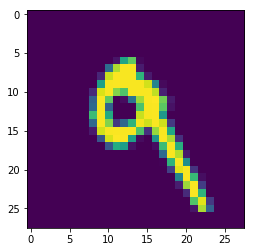

73.6453 82.5961 [  4.67260322e-03   9.18945763e-04   6.92333207e-02   5.19412970e-06
   1.76317982e-07   0.00000000e+00   0.00000000e+00   9.69554435e-07
   1.74542621e-03   1.46088926e-02   2.40500644e-02   8.81739055e-08
   1.14580723e-06   2.63825177e-06   1.56326760e-02   6.51780921e-11
   9.84820235e-06   0.00000000e+00   3.29958238e-02   3.52553116e-07
   3.51190157e-02   4.46608874e-06   6.09392161e-03   2.05399992e-04
   5.53202033e-02   7.65051391e-06   6.93966103e-06   8.81739055e-08
   1.25960335e-02   4.92170639e-02   1.41050834e-02   2.82020892e-06
   0.00000000e+00   6.48601949e-02   8.95448774e-02   0.00000000e+00
   5.61330914e-02   3.24966504e-06   0.00000000e+00   4.16193120e-02
   8.01037550e-02   1.11462474e-01   7.36022219e-02   4.49759699e-02
   1.99060421e-02   3.85640711e-02   0.00000000e+00   8.00926313e-02
   1.05781498e-06   2.28387974e-02   7.12610111e-02   1.05768083e-06
   3.60764216e-06   0.00000000e+00   5.78783825e-02   0.00000000e+00
   0.00000000e+00 

In [569]:
plt_show(x[7])
print(x_new.sum(),x[7].sum(),x_new)

In [147]:
img_show(x_new*255)

In [111]:
y = predict(network,x_new)
p = np.argmax(y)
print(y,p)

[  3.01142718e-05   2.58590531e-04   1.18248176e-03   9.96625543e-01
   1.27675506e-07   1.71582028e-03   3.31369961e-06   1.52847806e-05
   1.66059021e-04   2.59731860e-06] 3


## Numpy

In [399]:
tensor = np.array([0,-1,1])

In [397]:
tensor = abs(tensor)
print(tensor)

[0 1 1]


In [400]:
tensor.clip(min=0)

array([0, 0, 1])

## エンド